In [1]:
import pandas as pd

file = 'data/metacritic_games.csv'
data = pd.read_csv(file)
data.head()

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,Portal 2,PC,Valve Software,Action,NaN,E10+,"Apr 18, 2011",51,1,0,1700,107,19,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,"Nov 10, 2011",32,0,0,1616,322,451,94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,No Online Multiplayer,E10+,"Jun 19, 2011",84,1,0,283,20,5,94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,NaN,T,"Nov 21, 2011",27,0,0,240,34,27,91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,No Online Multiplayer,E,"Nov 13, 2011",81,1,0,251,39,11,90,84


# Data exploration

First get a look at the distribution of the metascores and userscores:

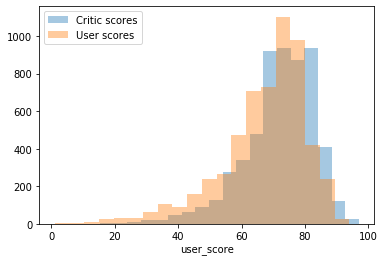

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

mscores = data['metascore']
uscores = data['user_score']

sns.distplot(mscores, bins = 20, kde = False, label = "Critic scores")
sns.distplot(uscores, bins = 20, kde = False, label = 'User scores')
plt.legend()

What type of genres perform more well than others with regards to metascore and userscore? Lets visualize the results for the most common ones. First we need to do some processing:

In [11]:
data_critics = data.drop(columns = ['user_score'])
data_critics['fromCritic'] = 1
data_critics = data_critics.rename(columns = {"metascore": "score"})

data_user = data.drop(columns = ['metascore'])
data_user['fromCritic'] = 0
data_user = data_user.rename(columns = {"user_score": "score"})

data_critics_user = pd.concat([data_critics, data_user],ignore_index = True)

common_genres = list(data['genre'].value_counts()[:6].index)
common_genres_data = data_critics_user.loc[data_critics_user['genre'].isin(common_genres)]

Now to the visualization. We can see the differences for genres and meta-/userscore nicely with violin plots:

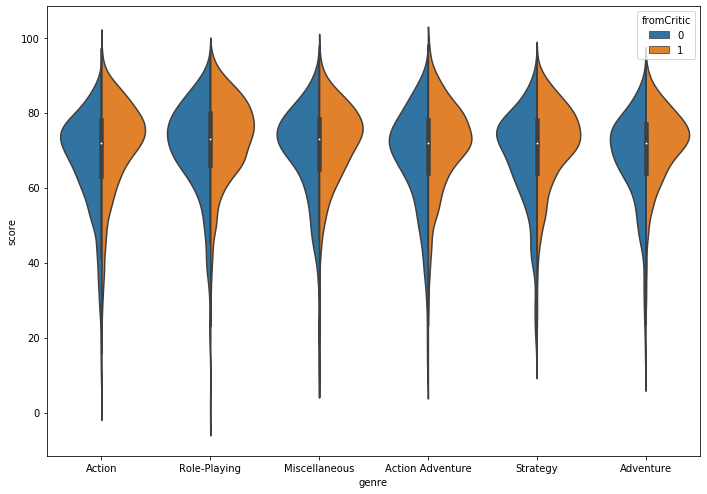

In [12]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize = (11.7, 8.27))
sns.violinplot(ax = ax, x = "genre", y = "score", hue = "fromCritic", data = common_genres_data, split = True)

Another thing to investigate is if having multiplayer mode is correlating positively with scores? For this we have to add a binary category first:

In [13]:
file = 'data/metacritic_games.csv'
data = pd.read_csv(file)

multiplayer_types = list(data['number_players'].value_counts().index)
multiplayer_types.remove('1 Player')

data.loc[data['number_players'] == '1 Player', 'number_players'] = 'Single'
data.loc[data['number_players'].isin(multiplayer_types), 'number_players'] = 'Multi'

Plot the distribution for multiplayer only 

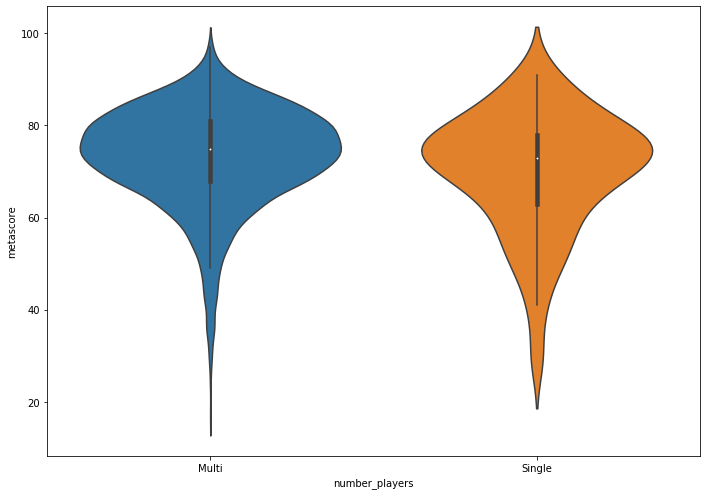

In [14]:
fig, ax = pyplot.subplots(figsize = (11.7, 8.27))
sns.violinplot(ax = ax, x = "number_players", y = "metascore", data = data)